<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

### Principal Component Analysis Outlier Detection With StandardScaler

### Anomaly detection/outlier analysis using the Principal component analysis Algorithm via the pyod library with the data scaling technique Standard Scaler.

### Required Packages

In [ ]:
!pip install pyod
!pip install plotly

In [119]:
import time
import warnings
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from pyod.models.pca import PCA
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

### Initialization

Filepath of CSV file

In [120]:
file_path= ""

List of features which are  required for model training .

In [133]:
features=[]

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [122]:
df=pd.read_csv(file_path);
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
1,1352300580,20141114T000000,247000.0,1,1.00,460,4120,1.0,0,0,...,4,460,0,1937,0,98055,47.4868,-122.199,990,4120
2,1320069249,20141020T000000,192500.0,1,1.00,470,63737,1.0,0,2,...,5,470,0,1924,0,98022,47.2163,-121.984,1350,46762
3,1437500015,20140709T000000,150000.0,3,0.75,490,38500,1.5,0,0,...,5,490,0,1959,0,98014,47.7112,-121.315,800,18297
4,859000110,20141002T000000,125000.0,1,1.00,500,7440,1.0,0,0,...,5,500,0,1928,0,98106,47.5252,-122.362,1350,7440


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X.

In [124]:
X=df[features]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.

In [125]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature set.


In [126]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])  
X=EncodeX(X)
X.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
1,247000.0,1,1.00,460,4120,1.0,0,0,3,4,460,0,1937,0,98055,47.4868,-122.199,990,4120
2,192500.0,1,1.00,470,63737,1.0,0,2,5,5,470,0,1924,0,98022,47.2163,-121.984,1350,46762
3,150000.0,3,0.75,490,38500,1.5,0,0,4,5,490,0,1959,0,98014,47.7112,-121.315,800,18297
4,125000.0,1,1.00,500,7440,1.0,0,0,1,5,500,0,1928,0,98106,47.5252,-122.362,1350,7440


### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [127]:
x_train,x_test=train_test_split(X,test_size=0.2,random_state=123)

### Data Rescaling
Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

$z = (x - u) / s$

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

For Reference

[StandardScaler API](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [128]:
st = StandardScaler()
x_train_scaled = st.fit_transform(x_train)
x_test_scaled = st.transform(x_test)

### Model

Principal component analysis (PCA) can be used in detecting outliers. PCA is a linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

In this procedure, covariance matrix of the data can be decomposed to orthogonal vectors, called eigenvectors, associated with eigenvalues. The eigenvectors with high eigenvalues capture most of the variance in the data.

#### Tuning parameters

>**n_components (int, float, None or string) –**

>Number of components to keep. if n_components is not set all components are kept:

>n_components == min(n_samples, n_features)
if n_components == ‘mle’ and svd_solver == ‘full’, Minka’s MLE is used to guess the dimension if 0 < n_components < 1 and svd_solver == ‘full’, select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components n_components cannot be equal to n_features for svd_solver == ‘arpack’.

>**n_selected_components (int, optional (default=None)) –** Number of selected principal components for calculating the outlier scores. It is not necessarily equal to the total number of the principal components. If not set, use all principal components.

>**contamination (float in (0., 0.5), optional (default=0.1)) –** The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the decision function.

>**copy (bool (default True)) –** If False, data passed to fit are overwritten and running fit(X).transform(X) will not yield the expected results, use fit_transform(X) instead.



**For more Reference** [PCA API](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.pca)

In [129]:
model = PCA(contamination=0.01)
model.fit(x_train_scaled)

PCA(contamination=0.01, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)

### Anomaly Prediction

In [130]:
result=x_test.copy(deep=True)
result['Anomaly']=model.predict(x_test_scaled)
result.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Anomaly
4720,1333000.0,4,4.50,3130,5126,3.0,0,0,3,10,2450,680,2014,0,98112,47.6239,-122.290,2540,7784,0
1569,445000.0,3,1.75,1490,10844,1.0,0,0,3,7,1210,280,1974,0,98008,47.6208,-122.106,2090,9944,0
3843,369946.0,3,2.50,2420,4725,2.0,0,0,3,8,2420,0,2014,0,98038,47.3710,-122.018,2370,4200,0
2754,250600.0,4,2.50,1930,8660,1.0,0,0,3,7,1120,810,1981,0,98001,47.3261,-122.260,1830,9591,0
3278,545000.0,3,2.50,2140,40173,2.0,0,0,4,8,2140,0,1990,0,98027,47.4786,-122.066,2380,43016,0


### Anomaly Visualization

#### Bar Plot

<AxesSubplot:>

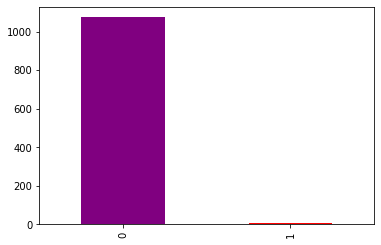

In [131]:
result['Anomaly'].value_counts().plot(kind='bar',color=['purple','red'])

#### Pie Chart

In [132]:
fig = px.pie(result['Anomaly'],names=result['Anomaly'], title='Anomaly rate',)
fig.show()